In [1]:
# Importo las librerias 'pandas' y 'numpy'

import pandas as pd                      # pandas: librería para el análisis de datos
import numpy as np                       # numpy: librería especializada en el cálculo numérico y análisis de datos

# Importo las librerías y paquetes necesarios para llevar a cabo el clustering

import matplotlib.pyplot as plt          # matplotlib: Libreria para realizar gráficos
from sklearn.cluster import KMeans       # Importo la función 'Kmeans' del módulo 'cluster ' del paquete sklearn

# También voy a necesitar 'pandas' y 'numpy' pero ya fueron importadas al inicio del notebook

In [2]:
# Para realizar los radar charts de las jugadoras con caracteristicas similares a la que buscamos, necesitermos le paquete 'pygal'

import pygal

 Como el paquete 'pygal' no esta incluido en Anaconda, debo instalarlo para poder utilizarlo
 En el repositorio se encuentra el archivo 'pygal-2.4.0-py2.py3-none-any.whl' necesario para la instalación 

In [3]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


# Adquisición de los datos

In [23]:
# Cargo los archivos de los partidos mediante la instrucción '.read_csv' de Pandas
# Almaceno cada uno de los archivos en una variable

df1 = pd.read_excel ('13_07_2021_Arsenal_players.xlsx')
df2 = pd.read_excel ('13_07_2021_Aston Villa_players.xlsx')
df3 = pd.read_excel ('13_07_2021_Birmingham City_players.xlsx')
df4 = pd.read_excel ('13_07_2021_Brighton & Hove Albion_players.xlsx')
df5 = pd.read_excel ('13_07_2021_Bristol City Women FC_players.xlsx')
df6 = pd.read_excel ('13_07_2021_Chelsea_players.xlsx')
df7 = pd.read_excel ('13_07_2021_Everton_players.xlsx')
df8 = pd.read_excel ('13_07_2021_Manchester City_players.xlsx')
df9 = pd.read_excel ('13_07_2021_Manchester United_players.xlsx')
df10 = pd.read_excel ('13_07_2021_Reading_players.xlsx')
df11 = pd.read_excel ('13_07_2021_Tottenham Hotspur_players.xlsx')
df12 = pd.read_excel ('13_07_2021_West Ham United_players.xlsx')

In [24]:
df5.head()

,Unnamed: 0,Unnamed: 1,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
0,16,Meaghan Sargeant,166,3,CD,-,-,-,-,-,...,England,Aston Villa,-,27,170,58,Right,-,08.13,259
1,19,Izzy Cook,158,1,LM,-,-,1,-,-,...,England,Bristol,-,-,-,-,Both,-,-,27
2,2,Faye Louise Bryson,168,17,RD,1,-,2,1,50%,...,England,Bristol,-,24,-,-,Right,-,-,970
3,21,Abigail Harrison,156,23,F,2,3,6,2,33%,...,Scotland,Bristol,-,23,-,-,Right,03.19,04.16,1084
4,27,Jessica Wooldridge,-,1,RM,-,-,-,-,-,...,England,Bristol,-,20,-,-,Both,-,05.18,4


# Concatenacion archivos

In [25]:
df = pd.concat ([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], sort = False)
df.head()

,Unnamed: 0,Unnamed: 1,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
0,10,Kim Alison Little,233,19,DM,5,4,12,5,42%,...,Scotland,Arsenal,Great Britain,31,162,60,Right,06.21,-,1541
1,30,Ruby Mace,178,6,CD,-,-,-,-,-,...,England,Birmingham,England U17,17,-,-,Both,-,10.19,70
2,9,Bethany Jane Mead,218,25,RM,4,11,19,4,21%,...,England,Arsenal,England,26,163,58,Right,04.21,08.14,1964
3,13,Lia Joеlle Waelti,219,23,DM,-,2,-,-,-,...,Switzerland,Arsenal,Switzerland. Frauen,28,168,56,Both,04.21,08.12,1904
4,21,Malin Jaya Gut,195,18,DM,-,-,1,-,-,...,Switzerland,Arsenal,Switzerland. Frauen,20,170,54,Both,04.21,04.19,836


# Cambio el nombre de las columnas.
Sustituyo nombre de columnas por otro mas apropiado del que tienen por defecto

In [26]:
df.rename (columns = {'Unnamed: 0': 'Index', 'Unnamed: 1':'Name'}, inplace = True)
df.head()

,Index,Name,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
0,10,Kim Alison Little,233,19,DM,5,4,12,5,42%,...,Scotland,Arsenal,Great Britain,31,162,60,Right,06.21,-,1541
1,30,Ruby Mace,178,6,CD,-,-,-,-,-,...,England,Birmingham,England U17,17,-,-,Both,-,10.19,70
2,9,Bethany Jane Mead,218,25,RM,4,11,19,4,21%,...,England,Arsenal,England,26,163,58,Right,04.21,08.14,1964
3,13,Lia Joеlle Waelti,219,23,DM,-,2,-,-,-,...,Switzerland,Arsenal,Switzerland. Frauen,28,168,56,Both,04.21,08.12,1904
4,21,Malin Jaya Gut,195,18,DM,-,-,1,-,-,...,Switzerland,Arsenal,Switzerland. Frauen,20,170,54,Both,04.21,04.19,836


# Eliminacion filas duplicadas

Es posible que se produzcan duplicados al concatenar archivos. Utilizo La columna 'NAME' para identificar duplicados y eliminar las filas repetidas

In [27]:
df.drop_duplicates ('Name', inplace = True)

# Transformacion columna 'Name' en indice

Sera mucho mas comodo que el indice de cada fila sea el nombre de la jugadora

In [28]:
# Transformo la columna 'Name' en el 'indice'

df.set_index ('Name', inplace = True)
df.head()

,Index,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",Сhances created,...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
Name,,,,,,,,,,,,,,,,,,,,,
Kim Alison Little,10,233,19,DM,5,4,12,5,42%,11,...,Scotland,Arsenal,Great Britain,31,162,60,Right,06.21,-,1541
Ruby Mace,30,178,6,CD,-,-,-,-,-,-,...,England,Birmingham,England U17,17,-,-,Both,-,10.19,70
Bethany Jane Mead,9,218,25,RM,4,11,19,4,21%,28,...,England,Arsenal,England,26,163,58,Right,04.21,08.14,1964
Lia Joеlle Waelti,13,219,23,DM,-,2,-,-,-,5,...,Switzerland,Arsenal,Switzerland. Frauen,28,168,56,Both,04.21,08.12,1904
Malin Jaya Gut,21,195,18,DM,-,-,1,-,-,-,...,Switzerland,Arsenal,Switzerland. Frauen,20,170,54,Both,04.21,04.19,836


# Reemplazo '-' por ceros


In [29]:
# Reemplazo '-' por ceros

df = df.replace ('-',0)
df

,Index,InStat Index,Matches played,Position,Goals,Assists,Chances,Chances successful,"Chances, % of conversion",Сhances created,...,Nationality,Team,National team,Age,Height,Weight,Foot,"National team (last match date, mm.yy)","Youth national team (last match date, mm.yy)",Minutes played
Name,,,,,,,,,,,,,,,,,,,,,
Kim Alison Little,10,233,19,DM,5,4,12,5,42%,11,...,Scotland,Arsenal,Great Britain,31,162,60,Right,06.21,0,1541
Ruby Mace,30,178,6,CD,0,0,0,0,0,0,...,England,Birmingham,England U17,17,0,0,Both,0,10.19,70
Bethany Jane Mead,9,218,25,RM,4,11,19,4,21%,28,...,England,Arsenal,England,26,163,58,Right,04.21,08.14,1964
Lia Joеlle Waelti,13,219,23,DM,0,2,0,0,0,5,...,Switzerland,Arsenal,Switzerland. Frauen,28,168,56,Both,04.21,08.12,1904
Malin Jaya Gut,21,195,18,DM,0,0,1,0,0,0,...,Switzerland,Arsenal,Switzerland. Frauen,20,170,54,Both,04.21,04.19,836
J. Beattie,5,227,10,CD,2,0,4,2,50%,2,...,Scotland,Arsenal,0,30,177,78,Right,02.21,05.10,746
Katie McCabe,15,249,25,LD,4,11,11,4,36%,29,...,Ireland,Arsenal,Republic of Ireland,25,164,0,Both,04.21,07.14,2131
Vivianne Miedema,11,242,26,F,19,6,57,19,33%,33,...,Netherlands,Arsenal,Netherlands,24,178,68,Both,06.21,07.14,2326
Leonie Rebekka Maier,20,204,15,RD,0,0,0,0,0,0,...,Germany,Arsenal,Germany,28,163,57,Right,06.21,09.12,714


# Eliminar los % de determinadas columnas para transformarlos en 'int' y poder trabajar con ellos

In [30]:
def no_percents (player_name,name_column):
     
     
    a = df.loc [player_name, name_column]
    
    if type (a) == str:
        b = a [:-1]
        result = int (b)
    else:
        result = a
      
    return result

no_percents ('S. Zadorsky','Air challenges won, %')

58

## Minutos jugados

In [31]:
# Antes de normalizar los datos, debemos dividir las estad'isticas por los partidos jugados
# 1.Creo una fx que introduciendo nombre jugadora me devuelve los partidos jugados

def minutos_jugados (player_name):
    
    result = df.loc [player_name, 'Minutes played']
    return result

minutos_jugados ('S. Zadorsky')

2360

# Partidos jugados

In [32]:
# Antes de normalizar los datos, debemos dividir las estad'isticas por los partidos jugados
# 1.Creo una fx que introduciendo nombre jugadora me devuelve los partidos jugados

def partidos_jugados (player_name):
    
    result = df.loc [player_name, 'Matches played']
    return result

partidos_jugados ('S. Zadorsky')

24

# Partidos de 90 minutos disputados

In [33]:
# Dividimos el total de minutos jugados entre 90 para saber cuantos partidos de 90 minutos ha jugado

def partidos_90min (player_name):
    
    a = df.loc [player_name, 'Minutes played']
    result = a / 90
    return result

partidos_90min ('S. Zadorsky')

26.22222222222222

## Equipo en el que juega

In [34]:
def where_she_plays (player_name):
    result = df.loc [player_name, 'Team']
    return result
where_she_plays ('S. Zadorsky')

'Tottenham'

## Posición jugadoras


In [36]:
def posicion (player_name):
    result = df.loc [player_name, 'Position']
    
    if result == 'CD':
        return 'Central defender' 
    if result == 'RD':
        return 'Right defender'
    if result == 'LD':
        return 'Left defender'
    
    if result == 'DM':
        return 'Defensive midfielder'
    if result == 'CM':
        return 'Central midfielder'
    if result == 'LM':
        return 'Left midfielder'
    if result == 'RM':
        return 'Right midfielder'
    
    if result == 'F':
        return 'Forward'
    
    return result    

In [37]:
posicion ('S. Zadorsky')

'Central defender'

# Nationality

In [38]:
def nationality (player_name):
    result = df.loc [player_name, 'Nationality']
    return result
nationality ('S. Zadorsky')

'Canada'

# National team

In [39]:
def national_team (player_name):
    result = df.loc [player_name, 'National team ']
    return result
national_team ('S. Zadorsky')

'Canada'

# Foot

In [40]:
def foot (player_name):
    result = df.loc [player_name, 'Foot']
    return result
foot ('S. Zadorsky')    

'Left'

# Age

In [41]:
def age (player_name):
    result = df.loc [player_name, 'Age']
    return result
age ('S. Zadorsky')  

28

# Height

In [42]:
def height (player_name):
    result = df.loc [player_name, 'Height']
    return result
height ('S. Zadorsky')  

172

# Weight

In [43]:
def weight (player_name):
    result = df.loc [player_name, 'Weight']
    return result
weight ('S. Zadorsky')  

67

# Elimino las columnas de datos que no voy a normalizar

In [44]:
Liga = df.drop (['Matches played','Minutes played','Index','InStat Index','Position', 'Chances, % of conversion', 'Accurate passes, %', 'Accurate crosses, %','Challenges won, %', 'Challenges in defence won, %','Challenges in attack won, %','Successful dribbles, %','Tackles won, %','Nationality','Team','National team ','Team','Foot','National team (last match date, mm.yy)','Youth national team (last match date, mm.yy)','Air challenges won, %','Age','Height','Weight','xG (Expected goals)'], axis = 1)
Liga

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Ball recoveries,Ball recoveries in opponent's half,Challenges,Defensive challenges,Attacking challenges,Air challenges,Dribbles,Tackles,Ball interceptions,Free ball pick ups
Name,,,,,,,,,,,,,,,,,,,,,
Kim Alison Little,5,4,12,5,11,3,10,0,0,1,...,92,31,184,85,99,29,37,32,69,137
Ruby Mace,0,0,0,0,0,2,0,0,0,1,...,4,1,12,5,7,1,1,3,3,11
Bethany Jane Mead,4,11,19,4,28,24,49,2,1,7,...,60,33,365,115,250,47,94,63,77,100
Lia Joеlle Waelti,0,2,0,0,5,14,36,3,0,0,...,146,46,303,185,118,42,39,100,117,158
Malin Jaya Gut,0,0,1,0,0,4,4,0,0,0,...,43,14,126,86,40,18,21,48,36,59
J. Beattie,2,0,4,2,2,1,0,1,0,0,...,77,16,86,66,20,35,7,17,42,56
Katie McCabe,4,11,11,4,29,17,35,4,0,3,...,142,40,335,178,157,45,95,73,139,185
Vivianne Miedema,19,6,57,19,33,15,12,2,0,11,...,30,19,426,78,348,72,131,31,45,90
Leonie Rebekka Maier,0,0,0,0,0,9,9,2,0,0,...,60,9,106,72,34,17,8,25,50,49


## Dividir los datos entre el numero de partidos jugados

In [45]:
# 1. Obtengo la fila de datos de la jugadora en cuestion
grouped = Liga.groupby('Name')
Zadorsky = grouped.get_group('S. Zadorsky')
Zadorsky

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Ball recoveries,Ball recoveries in opponent's half,Challenges,Defensive challenges,Attacking challenges,Air challenges,Dribbles,Tackles,Ball interceptions,Free ball pick ups
Name,,,,,,,,,,,,,,,,,,,,,
S. Zadorsky,1,1,2,1,2,13,6,1,0,0,...,202,30,210,168,42,60,12,37,183,189


In [47]:
# 2.Llamo a la variable 'partidos_jugados' para ver el numero de partidos disputados por la jugadora en cuestion

partidos_90min ('S. Zadorsky')
                


26.22222222222222

In [48]:
# 3. Divido las estadisticas por el numero de partidos jugados 

Zadorsky /  partidos_90min ('S. Zadorsky')

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Ball recoveries,Ball recoveries in opponent's half,Challenges,Defensive challenges,Attacking challenges,Air challenges,Dribbles,Tackles,Ball interceptions,Free ball pick ups
Name,,,,,,,,,,,,,,,,,,,,,
S. Zadorsky,0.038136,0.038136,0.076271,0.038136,0.076271,0.495763,0.228814,0.038136,0.0,0.0,...,7.70339,1.144068,8.008475,6.40678,1.601695,2.288136,0.457627,1.411017,6.978814,7.207627


# Funcion Statsplayer

In [49]:
# Junto todos los pasos anteriores para crear la fx 'Stats_player'
# En ella, introducimos el nombre de una jugadora y nos devuelve sus estadisticas/ partido

def Stats_player (name_player):
    
    grouped = Liga.groupby('Name')
    a = grouped.get_group(name_player)
    a = a / partidos_90min (name_player)
    a ['Team'] = [where_she_plays (name_player)]
    a ['Position'] = [posicion (name_player)]
    a ['Matches played'] = [partidos_jugados (name_player)]
    a ['Matches 90 min'] = [partidos_90min (name_player)]
    a ['minutos_jugados'] = [minutos_jugados (name_player)]
    a ['Nationality'] = [nationality (name_player)]
    a ['National_team'] = [national_team (name_player)]
    a ['Foot'] = [foot (name_player)]
    a ['Age'] = [age (name_player)]
    a ['Height'] = [height (name_player)]
    a ['Weight'] = [weight (name_player)]
    a ['Chances, % of conversion'] = [no_percents ((name_player),'Chances, % of conversion')]
    a ['Accurate crosses, %'] = [no_percents ((name_player),'Accurate crosses, %')]
    a ['Challenges won, %'] = [no_percents ((name_player),'Challenges won, %')]
    a ['Challenges in defence won, %'] = [no_percents ((name_player),'Challenges in defence won, %')]
    a ['Challenges in attack won, %'] = [no_percents ((name_player),'Challenges in attack won, %')]
    a ['Air challenges won, %'] = [no_percents ((name_player),'Air challenges won, %')]
    a ['Successful dribbles, %'] = [no_percents ((name_player),'Successful dribbles, %')]
    a ['Tackles won, %'] = [no_percents ((name_player),'Tackles won, %')]
    a ['Accurate passes, %'] = [no_percents ((name_player),'Accurate passes, %')]
    a ['xG (Expected goals)'] = [no_percents ((name_player),'xG (Expected goals)')]
            
    return a

Stats_player ('S. Zadorsky')    

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
S. Zadorsky,0.038136,0.038136,0.076271,0.038136,0.076271,0.495763,0.228814,0.038136,0.0,0.0,...,50,0,57,59,50,58,58,57,82,0.83


In [50]:
Stats_player ('Bethany England') 

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
Bethany England,0.608108,0.552826,1.934889,0.608108,1.603194,0.386978,0.552826,0.0,0.0,0.718673,...,31,31,35,30,36,34,41,50,76,11.23


# Lista todas las jugadoras del equipo


In [51]:
# Creamos una lista que guarde los nombres de todas las jugadoras para crear una tabla con las estadisticas de todas ellas
# Pasaremos esta lista a la fx Statsplayers

lista_filas = df.index
lista_filas

Index(['Kim Alison Little', 'Ruby Mace', 'Bethany Jane Mead',
       'Lia Joеlle Waelti', 'Malin Jaya Gut', 'J. Beattie', 'Katie McCabe',
       'Vivianne Miedema', 'Leonie Rebekka Maier', 'S. Catley',
       ...
       'Hawa Cissoko', 'Mayumi Pacheco', 'A. Leon', 'Martha Ellen Thomas',
       'Ruby Grant', 'Rachel Ann Daly', 'G. Flaherty', 'Leanne Kiernan',
       'Kenza Dali', 'Wiktoria Kiszkis'],
      dtype='object', name='Name', length=257)

In [52]:
def stats_season (lista_filas):
    
    tabla = Stats_player ('S. Zadorsky')  
    
    for k in (lista_filas):
        
        if k != 'S. Zadorsky':
            grouped = Liga.groupby('Name')
            a = grouped.get_group(k)
            a = a / partidos_90min (k)
            a ['Team'] = [where_she_plays (k)]
            a ['Position'] = [posicion (k)]
            a ['Matches played'] = [partidos_jugados (k)]
            a ['Matches 90 min'] = [partidos_90min (k)]
            a ['minutos_jugados'] = [minutos_jugados (k)]
            a ['Nationality'] = [nationality (k)]
            a ['National_team'] = [national_team (k)]
            a ['Foot'] = [foot (k)]
            a ['Age'] = [age (k)]
            a ['Height'] = [height (k)]
            a ['Weight'] = [weight (k)]
            a ['Chances, % of conversion'] = [no_percents ((k),'Chances, % of conversion')]
            a ['Accurate crosses, %'] = [no_percents ((k),'Accurate crosses, %')]
            a ['Challenges won, %'] = [no_percents ((k),'Challenges won, %')]
            a ['Challenges in defence won, %'] = [no_percents ((k),'Challenges in defence won, %')]
            a ['Challenges in attack won, %'] = [no_percents ((k),'Challenges in attack won, %')]
            a ['Air challenges won, %'] = [no_percents ((k),'Air challenges won, %')]
            a ['Successful dribbles, %'] = [no_percents ((k),'Successful dribbles, %')]
            a ['Tackles won, %'] = [no_percents ((k),'Tackles won, %')]
            a ['Accurate passes, %'] = [no_percents ((k),'Accurate passes, %')]
            a ['xG (Expected goals)'] = [no_percents ((k),'xG (Expected goals)')]
           
            
    

        tabla = tabla.append(a, ignore_index = False)
        
    
    return tabla



In [53]:
lista_filas.tolist()  

['Kim Alison Little',
 'Ruby Mace',
 'Bethany Jane Mead',
 'Lia Joеlle Waelti',
 'Malin Jaya Gut',
 'J. Beattie',
 'Katie McCabe',
 'Vivianne Miedema',
 'Leonie Rebekka Maier',
 'S. Catley',
 'Anna Patten',
 'V. Schnaderbeck',
 'L. Williamson',
 'Carlotte Wubben-Moy',
 'Jill Jamie Roord',
 'Noelle Maritz',
 'Daniеlle van de Donk',
 'Lisa Catherine Evans',
 'Anouk Denton',
 'Jordan Nobbs',
 'Caitlin Jade Foord',
 'Asmita Ale',
 'Ramona Petzelberger',
 'Marisa Henrike Ewers',
 'Diana Silva',
 'E. Franklin-Fraiture',
 'Olivia McLoughlin',
 'Nadine Hanssen',
 'A. Asante',
 'Shania Hayles',
 'Jodi Hutton',
 'Mana Iwabuchi',
 'Emma Mary Follis',
 'Freya Gregory',
 'Chloe Susan Arthur',
 'Emily Syme',
 "Elisha N'Dow",
 'Stine Larsen',
 'Sophie Haywood',
 'N. Haigh',
 'Amy West',
 'Caroline Siems',
 'Jamie-Lee Napier',
 'Gemma Lawley',
 'Mollie Green',
 'Ruesha Littlejohn',
 'Harriet Scott',
 'Emma Rose Kelly',
 'Emily Murphy',
 'C. Scofield',
 'Abbi Grant',
 'Sarah Emma Mayling',
 'Claudia Wa

In [54]:
tabla = stats_season (lista_filas)    
tabla                                 

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %",xG (Expected goals)
Name,,,,,,,,,,,,,,,,,,,,,
S. Zadorsky,0.038136,0.038136,0.076271,0.038136,0.076271,0.495763,0.228814,0.038136,0.000000,0.000000,...,50,0,57,59,50,58,58,57,82,0.83
Kim Alison Little,0.292018,0.233615,0.700844,0.292018,0.642440,0.175211,0.584036,0.000000,0.000000,0.058404,...,42,25,62,62,62,59,78,66,89,5.44
Ruby Mace,0.000000,0.000000,0.000000,0.000000,0.000000,2.571429,0.000000,0.000000,0.000000,1.285714,...,0,100,42,40,43,0,0,33,88,0.00
Bethany Jane Mead,0.183299,0.504073,0.870672,0.183299,1.283096,1.099796,2.245418,0.091650,0.045825,0.320774,...,21,20,43,51,39,40,48,59,73,4.89
Lia Joеlle Waelti,0.000000,0.094538,0.000000,0.000000,0.236345,0.661765,1.701681,0.141807,0.000000,0.000000,...,0,0,61,64,56,52,69,72,88,0.07
Malin Jaya Gut,0.000000,0.000000,0.107656,0.000000,0.000000,0.430622,0.430622,0.000000,0.000000,0.000000,...,0,0,47,48,45,56,52,42,88,0.57
J. Beattie,0.241287,0.000000,0.482574,0.241287,0.241287,0.120643,0.000000,0.120643,0.000000,0.000000,...,50,0,69,70,65,71,86,71,92,0.65
Katie McCabe,0.168935,0.464571,0.464571,0.168935,1.224777,0.717973,1.478179,0.168935,0.000000,0.126701,...,36,36,57,59,55,51,64,58,79,1.80
Vivianne Miedema,0.735168,0.232158,2.205503,0.735168,1.276870,0.580396,0.464316,0.077386,0.000000,0.425623,...,33,23,35,31,36,35,49,39,79,18.12


# Creo una tabla a partir de la cual relizaremos los radar Charts

In [55]:
tabla.to_excel('FAWSL_Stats_90.xlsx')             

# Filtro 

In [35]:
filtro_equipo = tabla.groupby('Team')

In [37]:
Depor = filtro_equipo.get_group('Deportivo')
Depor

,Goals,Assists,Chances,Chances successful,Сhances created,Fouls,Fouls suffered,Yellow cards,Red cards,Offsides,...,Weight,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Alba Merino Sanchez,0.280156,0.070039,0.700389,0.280156,0.595331,1.435798,1.961089,0.280156,0.000000,0.070039,...,52,40,24,49,55,43,45,49,59,66
María Figueroa,0.000000,0.000000,0.743802,0.000000,0.743802,2.975207,0.000000,0.743802,0.000000,0.000000,...,0,0,0,62,56,75,50,0,67,76
Tatiana Blanco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,67,100,50,0,100,100,57
Noelia Villegas Rico,0.000000,0.036855,0.000000,0.000000,0.184275,0.626536,0.221130,0.073710,0.036855,0.073710,...,58,0,62,58,57,63,62,55,60,71
Cristina Martínez,0.000000,0.034169,0.136674,0.000000,0.205011,1.127563,0.649203,0.068337,0.000000,0.068337,...,0,0,19,47,52,38,35,36,51,70
Helena Torres,0.000000,0.000000,0.584416,0.000000,0.584416,1.461039,1.168831,0.292208,0.000000,0.000000,...,0,0,33,38,59,32,23,55,88,72
Iris Arnaiz Gil,0.000000,0.000000,0.033570,0.000000,0.067139,0.604252,0.469974,0.134278,0.000000,0.000000,...,0,0,0,63,61,70,58,75,62,76
Ainize Barea Nunez,0.346154,0.115385,0.923077,0.346154,0.615385,0.269231,1.500000,0.038462,0.000000,0.384615,...,53,38,25,33,29,34,27,53,38,74
Rosalía Muiño,0.000000,0.498615,0.000000,0.000000,0.498615,0.498615,2.991690,0.000000,0.000000,0.249307,...,0,0,0,35,33,36,35,38,46,66


In [38]:
Depor.to_excel('Stats90Depor.xlsx')

In [98]:
logrono = filtro_equipo.get_group('Logrono')
logrono

,Air challenges,Assists,Attacking challenges,Ball interceptions,Ball recoveries,Ball recoveries in opponent's half,Challenges,Chances,Chances successful,Crosses,...,Weight,"Chances, % of conversion","Accurate crosses, %","Challenges won, %","Challenges in defence won, %","Challenges in attack won, %","Air challenges won, %","Successful dribbles, %","Tackles won, %","Accurate passes, %"
Name,,,,,,,,,,,,,,,,,,,,,
Chini,2.600000,0.166667,6.800000,4.966667,5.366667,2.300000,14.100000,0.233333,0.000000,0.300000,...,53,0,22,46,44,48,36,60,48,78
R. Elloh,2.931034,0.103448,15.551724,1.758621,1.896552,0.896552,20.482759,0.448276,0.137931,1.413793,...,0,31,20,40,43,40,39,48,54,59
Marta Cazalla Garcia,3.720000,0.000000,1.720000,8.240000,8.240000,0.480000,10.520000,0.120000,0.000000,0.160000,...,67,0,25,67,67,67,69,55,53,76
Grace Asantewaa,2.565217,0.000000,8.826087,2.652174,3.565217,1.217391,15.739130,0.304348,0.130435,0.304348,...,0,43,0,50,50,51,47,63,47,71
Valeria Pascuet,0.500000,0.000000,2.200000,1.000000,1.000000,0.500000,4.800000,0.100000,0.100000,0.200000,...,0,100,0,46,38,55,60,67,41,64
Jade Boho,5.360000,0.240000,14.320000,1.880000,1.200000,0.600000,17.960000,0.680000,0.280000,2.720000,...,65,41,29,40,36,41,41,53,45,66
D. Caracas,1.826087,0.043478,5.000000,4.782609,4.347826,0.782609,14.565217,0.000000,0.000000,1.652174,...,0,0,16,57,60,53,43,55,64,72
Olga Garcia Perez,2.900000,0.000000,10.100000,2.300000,1.600000,0.400000,15.000000,0.600000,0.100000,0.400000,...,64,17,50,37,35,39,28,53,38,72
Lova Lundin,5.500000,0.000000,12.666667,0.666667,0.500000,0.166667,15.666667,0.833333,0.166667,0.500000,...,0,20,67,26,11,29,36,14,17,64


In [49]:
logrono.to_excel('logrono.xlsx')

In [52]:
logrono.loc['Chini',"Dribbles"]

1.8275862068965518

# Perfil jugadoras 

In [46]:
def perfil_jugadora (name_player):
    
    result = pd. Series (([posicion (name_player)],[partidos_jugados (name_player)]), index = ['Position','Matches played'])
    return result 
                         
perfil_jugadora ('Alexia Putellas')                         

Position          [Central midfielder]
Matches played                    [33]
dtype: object

In [ ]:
def perfil_jugadora (name_player):
    
    result = pd.DataFrame (([posicion (name_player)],[partidos_jugados (name_player)]), index = ['Position','Matches played'])
    return result 
                         
perfil_jugadora ('Alexia Putellas')                         

In [ ]:
    a ['Team'] = [where_she_plays (name_player)]
    a ['Position'] = [posicion (name_player)]
    a ['Matches played'] = [partidos_jugados (name_player)]
    a ['Nationality'] = [nationality (name_player)]
    a ['National_team'] = [national_team (name_player)]
    a ['Foot'] = [foot (name_player)]
    a ['Age'] = [age (name_player)]
    a ['Height'] = [height (name_player)]
    a ['Weight'] = [weight (name_player)]

In [165]:
def perfil (name_player):
    data = {'a': [[[name_player],[where_she_plays (name_player)],[posicion (name_player)] , [partidos_jugados (name_player)] , 
                     [nationality (name_player)], [national_team (name_player)],[foot (name_player)] , [age (name_player)],
                    [height (name_player)],[weight (name_player)]],'b':[1,2,3,4,5,6,7,8,9]}
    df = pd.DataFrame (data)
    return df
perfil ('Alexia Putellas')

SyntaxError: invalid syntax (<ipython-input-165-edf3bfb1bdd2>, line 4)

In [167]:
# BUENAAAAAA

def perfil_jugadora (name_player):
    
    data = {'': [[name_player],[where_she_plays (name_player)],[posicion (name_player)] , [partidos_jugados (name_player)] , 
                 [nationality (name_player)], [national_team (name_player)],[foot (name_player)] , [age (name_player)],
                [height (name_player)],[weight (name_player)]]}
    
    df = pd.DataFrame(data, index = ['Name player','Team','Position','Matches played','Nationality','National team','Foot',
                                    'Age','Height','Weight']
    df
      

SyntaxError: invalid syntax (<ipython-input-167-032081228674>, line 11)

In [ ]:
pd.DataFrame(np.arange(10.).reshape 10,1),
             index = 

In [108]:
perfil_jugadora ('Alexia Putellas')  

,
1,[Alexia Putellas]
2,[Barcelona]
3,[Central midfielder]
4,[33]
5,[Spain]
6,[Spain]
7,[Left]
8,[27]
9,[173.0]
10,[67.0]


In [2]:
df = pd.DataFrame(data, index = np.arange(1, 8))
df

NameError: name 'pd' is not defined

In [42]:
partidos_jugados ('Chini')

29

In [41]:
where_she_plays ('Chini')

'Logrono'

In [40]:
posicion ('Chini')

'Central midfielder'

In [72]:
# Normalizamos los datos de la tabla con las estad'iticas de todas las jugadoras

df_normalizado_radar = (tabla_radar - tabla_radar.min()) / (tabla_radar.max() - tabla_radar.min())
df_normalizado_radar.head()

NameError: name 'tabla_radar' is not defined

In [31]:
df_normalizado.fillna('0')

NameError: name 'df_normalizado' is not defined

# Radar charts

In [69]:
# Es necesario decidir que caracteristicas del juego son necesarias para las distintas demarcaciones
# Para ello vamos a una lista con los tipos de caract. del juego

index_columns = df3.columns                      # Obtengo una lista con las etiquetas de las columnas
lista_nombres_columnas = list(index_columns)          # Almaceno en una variable dicha lista con los nombres de las columnas.
lista_nombres_columnas

['Air challenges',
 'Assists',
 'Attacking challenges',
 'Ball interceptions',
 'Ball recoveries',
 "Ball recoveries in opponent's half",
 'Challenges',
 'Chances',
 'Chances successful',
 'Crosses',
 'Defensive challenges',
 'Dribbles',
 'Fouls',
 'Fouls suffered',
 'Free ball pick ups',
 'Goals',
 'Key passes',
 'Lost balls',
 'Lost balls in own half',
 'Offsides',
 'Passes',
 'Red cards',
 'Shots',
 'Shots on target',
 'Tackles',
 'Yellow cards',
 'xG (Expected goals)',
 'Сhances created']

In [70]:
# Tengo que hacer pasos anteriores como juntar todas las filas de cada jugadora en una unica tabla y normalizar los datos

def radar_chart (name_player):
    

    features = ['Goals','Dribbles','Chances','Chances successful','Сhances created','Shots','Shots on target','Attacking challenges']
    features_data = [df_normalizado.loc [name_player,'Goals'],df_normalizado.loc [name_player,'Assists'],
                     df_normalizado.loc [name_player,'Chances'], df_normalizado.loc [name_player,'Chances successful'],
                     df_normalizado.loc [name_player,'Сhances created'], df_normalizado.loc [name_player,'Fouls'],
                     df_normalizado.loc [name_player,'Fouls suffered'],df_normalizado.loc [name_player,'Attacking challenges']]
    features_data =  np.concatenate ((features_data,[features_data[0]]))
    label_placement = np.linspace(start = 0, stop =2*np.pi, num=len (features_data))
    plt.figure (figsize = (6,6))
    plt.subplot(polar=True)
    plt.plot(label_placement,features_data)
    lines,labels = plt.thetagrids(np.degrees(label_placement),labels = features)

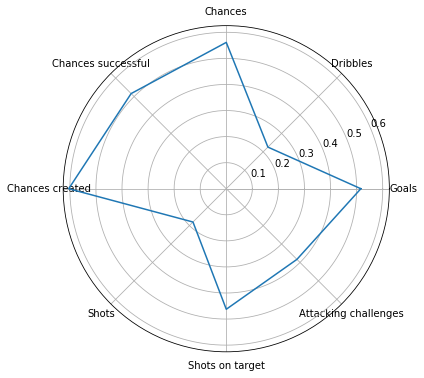

In [71]:
radar_chart ('Alexia Putellas')

In [117]:
radar_chart ('Angela Sosa Martin')

NameError: name 'radar_chart' is not defined

In [49]:
radar_chart ('Jenifer Hermoso')

NameError: name 'radar_chart' is not defined

In [137]:
posicion ('Ane Campos')

'Forward'

In [138]:
partidos_jugados ('Ane Campos')

11